# Insurance claim predictions

Problem Statement

CarIns is a startup that provides insurance for cars. It is one of the best car insurance brands known for the highest claim settlement ratio. It was launched back in Oct 2020 and acquired its initial policyholders by providing a hassle-free claim process, instant policy issuance, and claim settlements at minimum coverages.

As it's a fast growing startup, the company would like to optimize the cost of the insurance by identifying the policyholders who are more likely to claim in the next 6 months. 

Now the company would like to use Data Science to identify the policyholders whose chances of filing a claim are high in the next 6 months. The company challenges the Data Science community to build a high-performance algorithm to predict if the policyholder will file a claim in the next 6 months or not based on the set of car and policy features.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0


In [5]:
# Combine the data
combined = pd.concat([train,test],ignore_index=True)
combined.shape

(97655, 44)

In [6]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0.0


In [7]:
# Curate the list of cat variables
combined.select_dtypes(include='O').columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [8]:
cat_cols = ['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert','is_claim']

In [9]:
len(cat_cols)

26

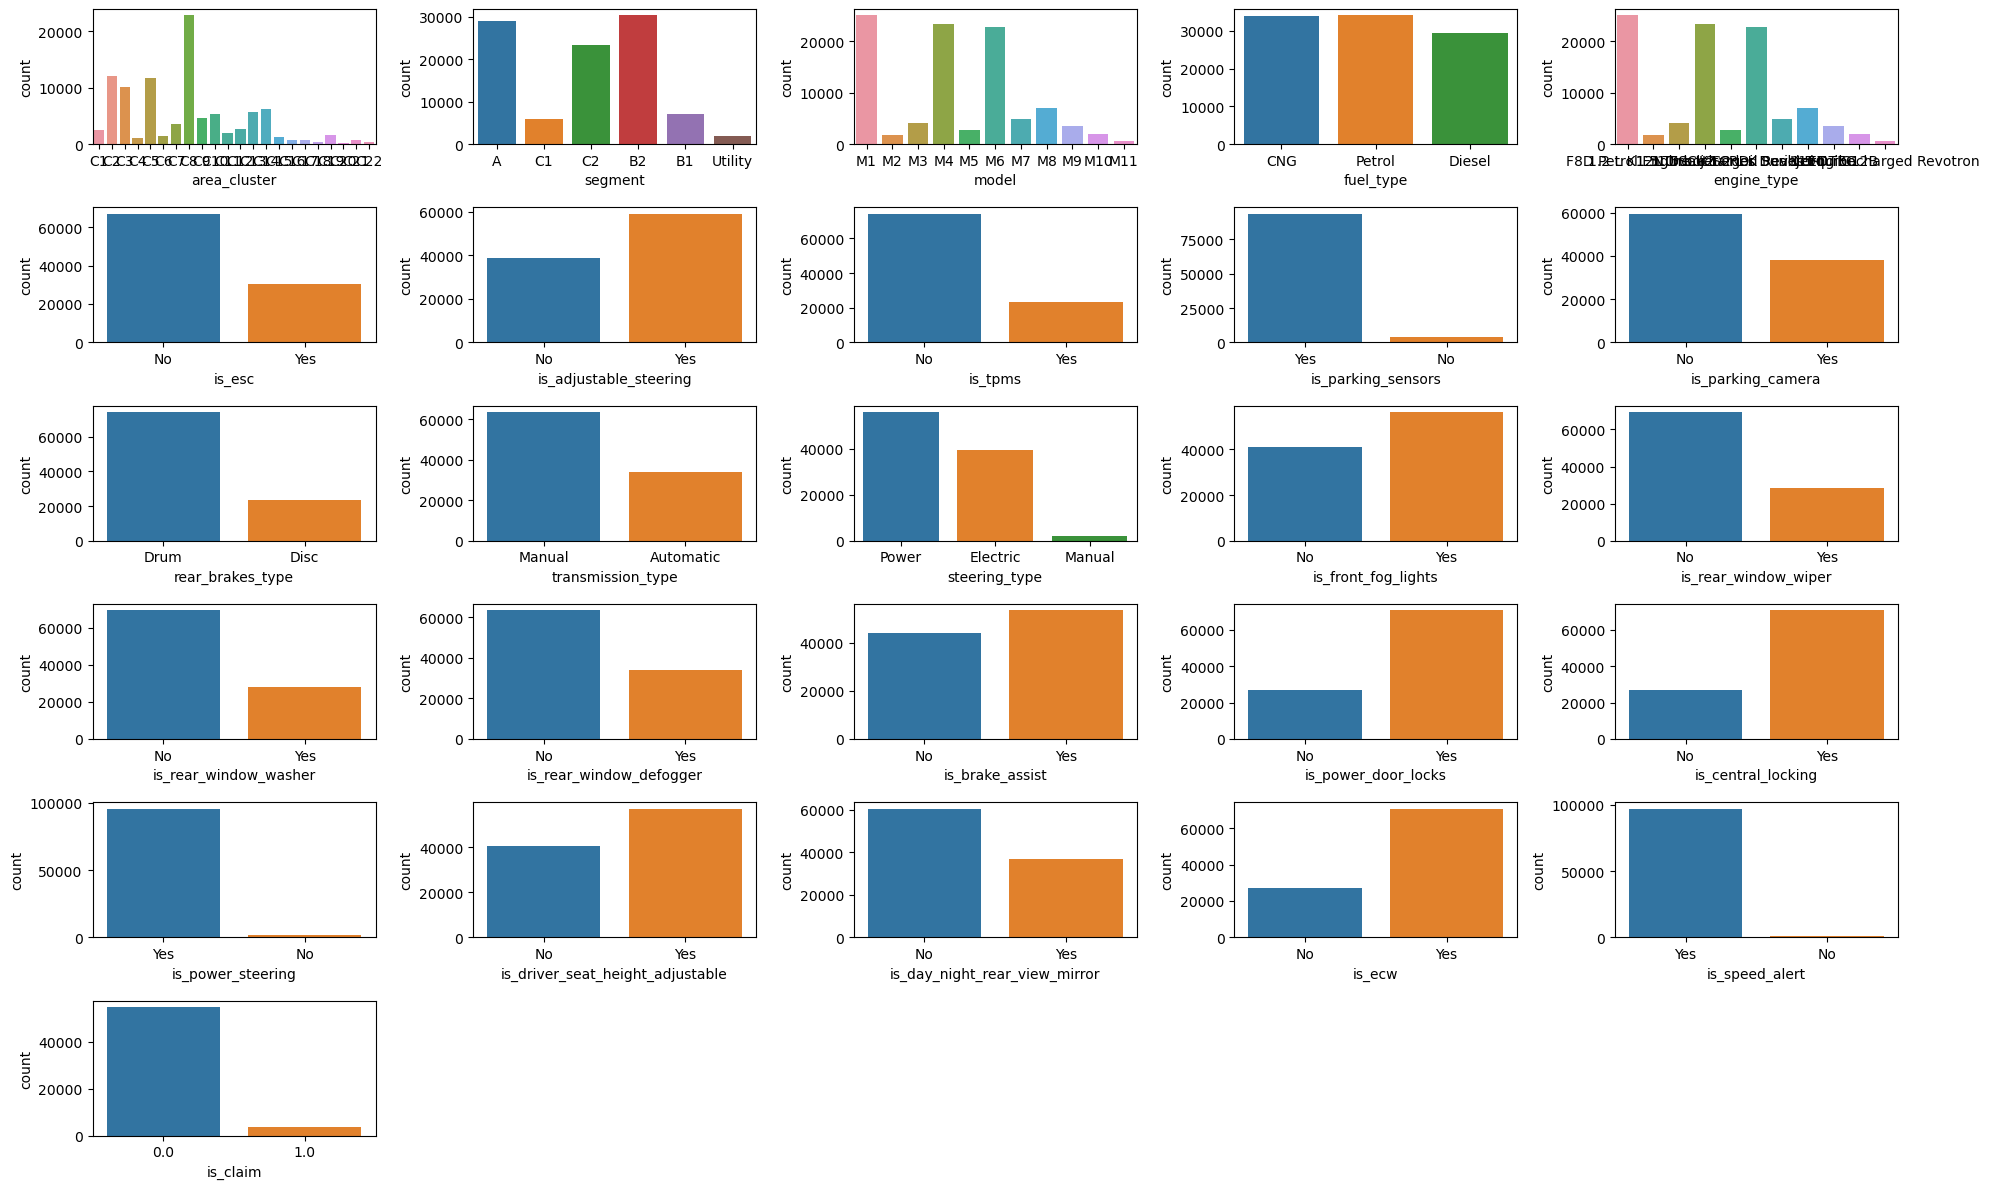

In [10]:
plt.figure(figsize=(20,12))
nr = 6
nc = 5
ite = 1
for i in cat_cols:
    plt.subplot(nr,nc,ite)
    sns.countplot(combined.loc[:,i])
    ite+=1
plt.tight_layout()
plt.show()

# Steering type, brake assist is given
# Central locking is available & Driver seat is adjustable
# 

<AxesSubplot:>

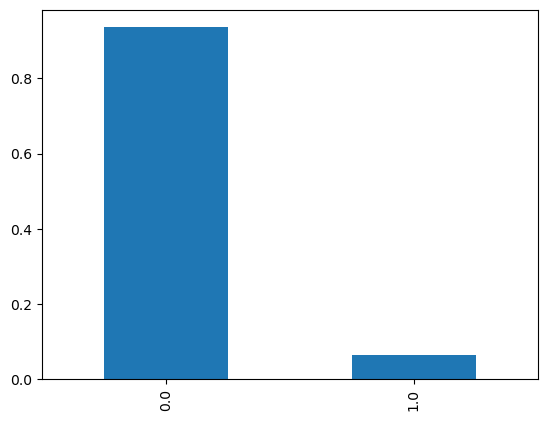

In [11]:
combined.is_claim.value_counts(normalize=True).plot(kind='bar')

In [12]:
train.loc[train.is_claim==1].describe(include='O')

,policy_id,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
count,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748
unique,3748,22,6,11,3,9,9,11,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2
top,ID00013,C8,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,No,Yes,No,Yes,No,Drum,Manual,Power,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
freq,1,954,1256,939,1363,1220,1220,939,2551,2370,2847,3620,2290,2847,2438,2078,2254,2646,2646,2418,2136,2757,2757,3675,2269,2267,2757,3733


In [13]:
combined.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,97655.000000,97655.000000,97655.000000,97655.00000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,58592.000000
mean,0.611269,0.069508,0.469287,18822.60809,1.763586,3.138109,1161.655829,3.624423,5.245579,4.853024,3850.017715,1672.050187,1553.214500,1384.966750,1.759664,0.063968
std,0.414494,0.056774,0.122560,17656.79257,1.135832,1.831993,266.560176,0.484274,0.430432,0.228059,311.745860,112.042508,79.385788,212.543007,1.388415,0.244698
min,0.002735,0.000000,0.288462,290.00000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000,0.000000
25%,0.209729,0.020000,0.375000,6112.00000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.000000,1185.000000,0.000000,0.000000
50%,0.573891,0.060000,0.451923,8794.00000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,2.000000,0.000000
75%,1.039740,0.110000,0.548077,27003.00000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.00000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,5.000000,1.000000


In [14]:
combined.select_dtypes(exclude='O').columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

In [15]:
combined.ncap_rating.unique()

array([0, 2, 3, 5, 4], dtype=int64)

In [16]:
# Convert ncap in category 
combined['ncap_rating'] = combined['ncap_rating'].astype('object')

In [17]:
num_cols = ['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'displacement',  'turning_radius', 'length', 'width', 'height',
       'gross_weight']

In [18]:
len(num_cols)

10

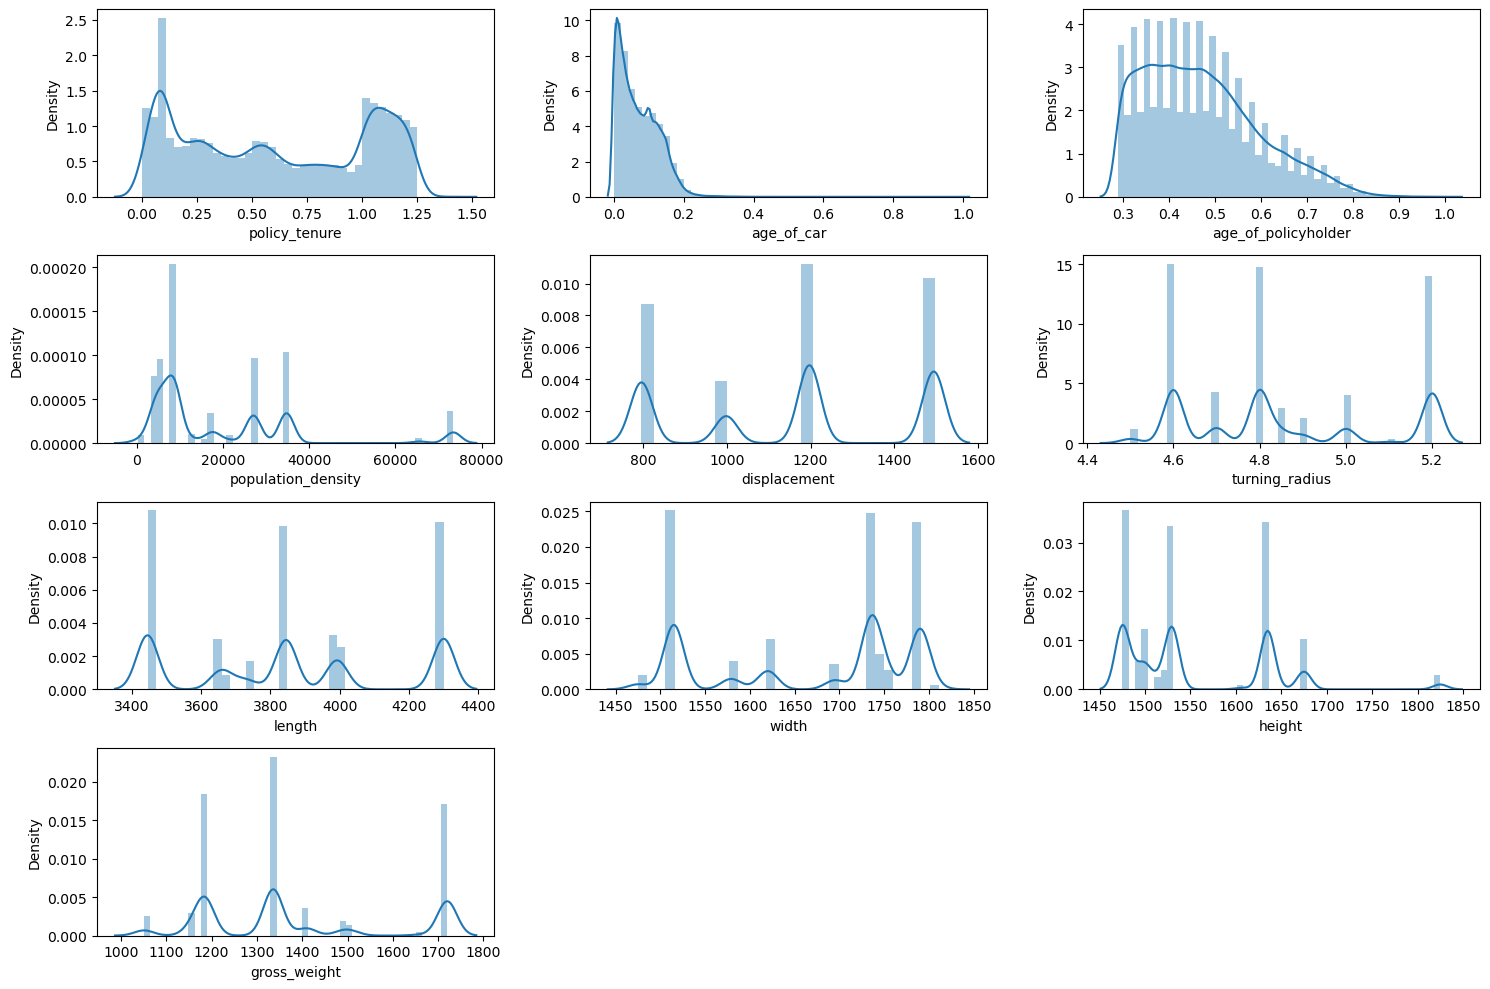

In [19]:
plt.figure(figsize=(15,10))
nr = 4
nc = 3
ite = 1
for i in num_cols:
    plt.subplot(nr,nc,ite)
    sns.distplot(combined[i])
    ite+=1
plt.tight_layout()
plt.show()

In [20]:
combined.loc[:,num_cols].describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,displacement,turning_radius,length,width,height,gross_weight
count,97655.000000,97655.000000,97655.000000,97655.00000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000
mean,0.611269,0.069508,0.469287,18822.60809,1161.655829,4.853024,3850.017715,1672.050187,1553.214500,1384.966750
std,0.414494,0.056774,0.122560,17656.79257,266.560176,0.228059,311.745860,112.042508,79.385788,212.543007
min,0.002735,0.000000,0.288462,290.00000,796.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000
25%,0.209729,0.020000,0.375000,6112.00000,796.000000,4.600000,3445.000000,1515.000000,1475.000000,1185.000000
50%,0.573891,0.060000,0.451923,8794.00000,1197.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000
75%,1.039740,0.110000,0.548077,27003.00000,1493.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000
max,1.396641,1.000000,1.000000,73430.00000,1498.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000


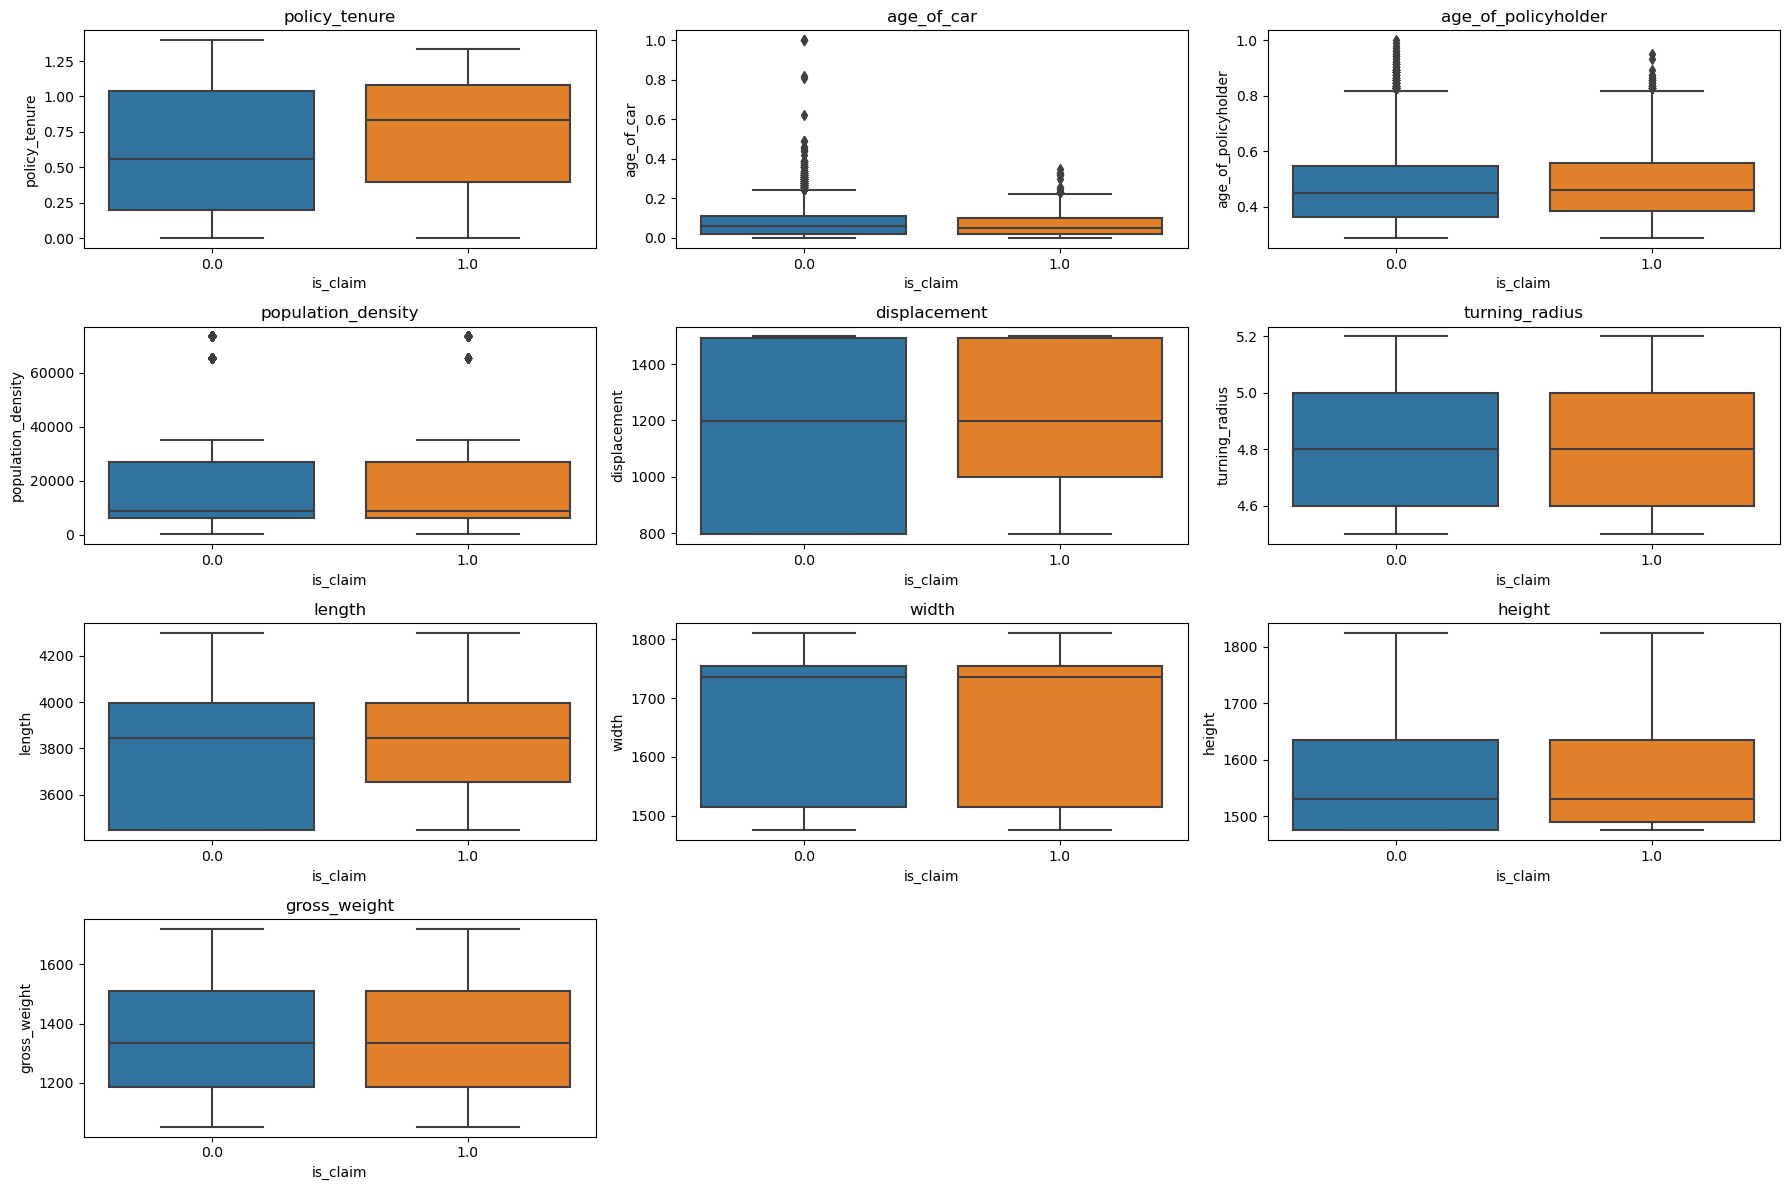

In [21]:
# Bivariate analysis
plt.figure(figsize=(18,12))
nr = 4
nc = 3
ite = 1
for i in num_cols:
    plt.subplot(nr,nc,ite)
    sns.boxplot(combined.is_claim,combined.loc[:,i])
    ite+=1
    plt.title(i)
plt.tight_layout()
plt.show()

In [22]:
len(cat_cols)

26

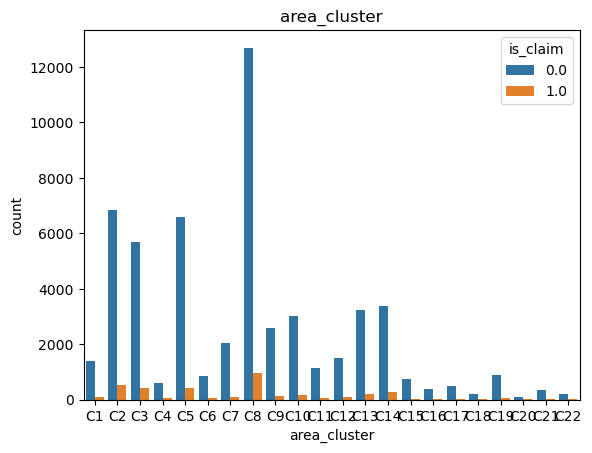

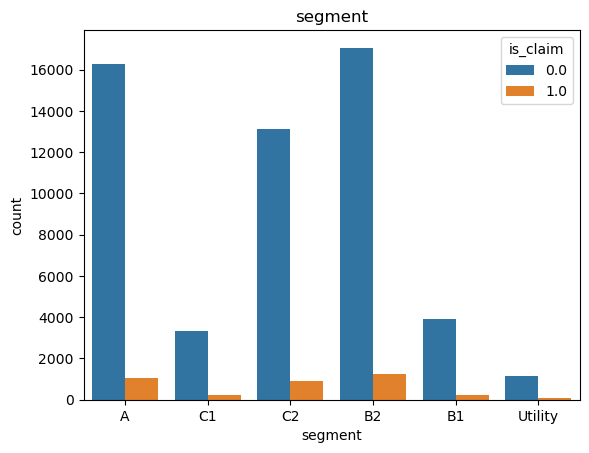

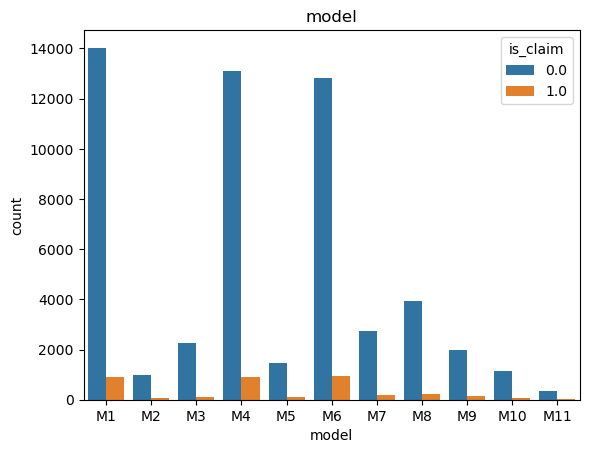

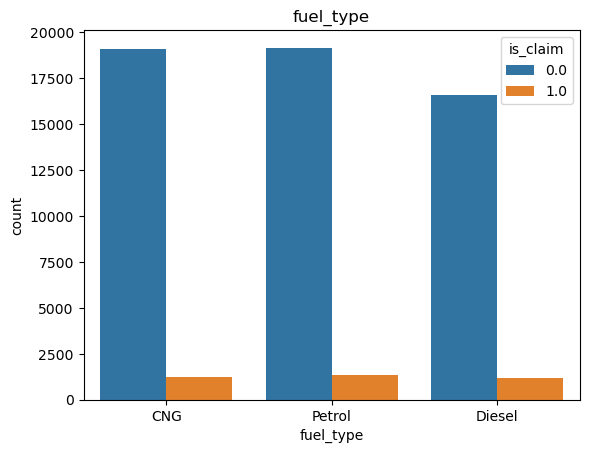

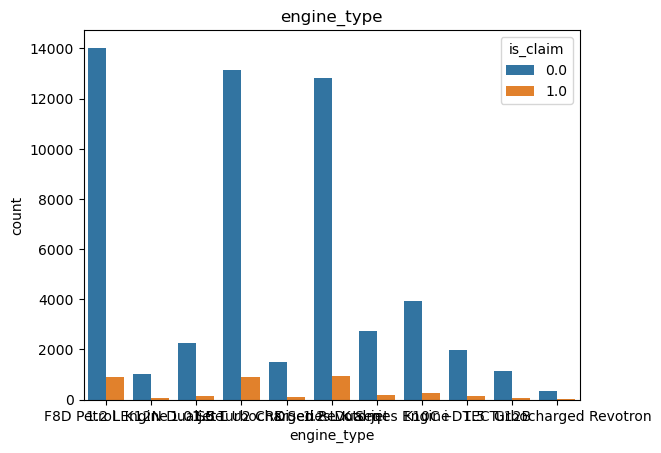

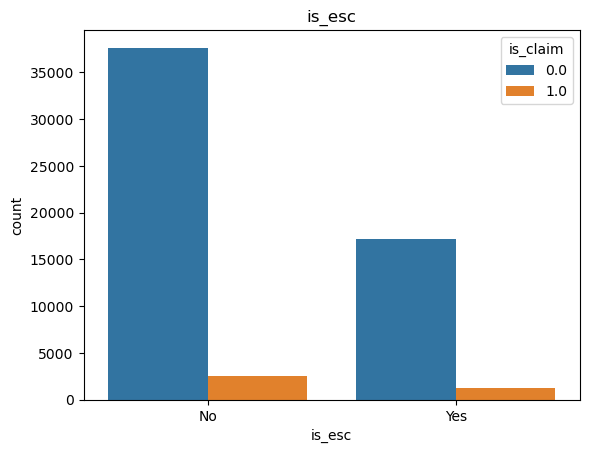

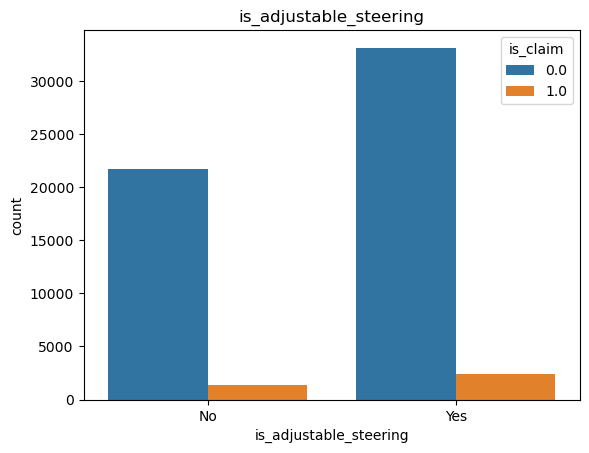

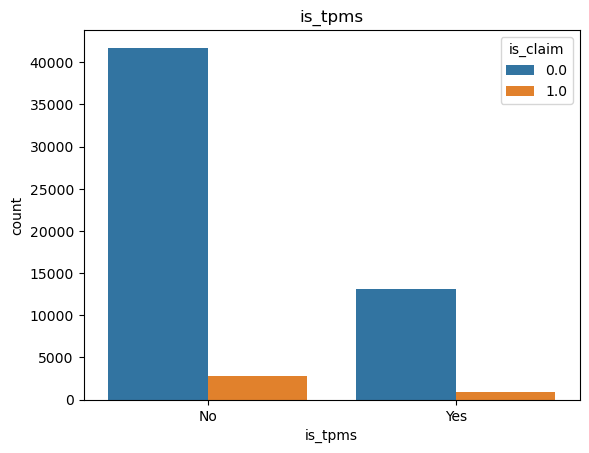

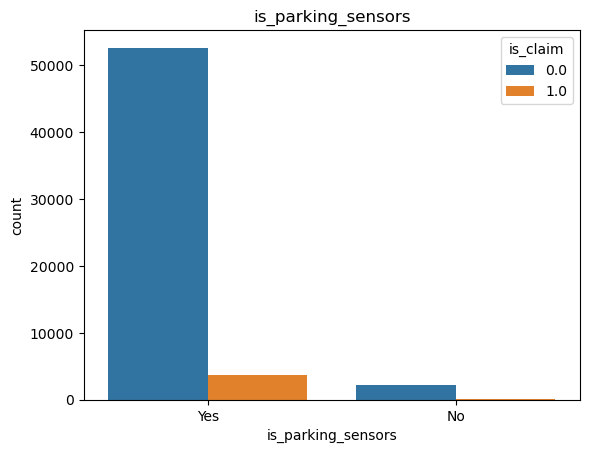

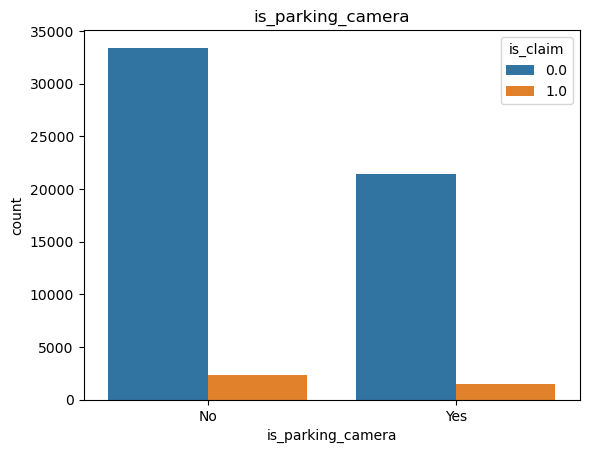

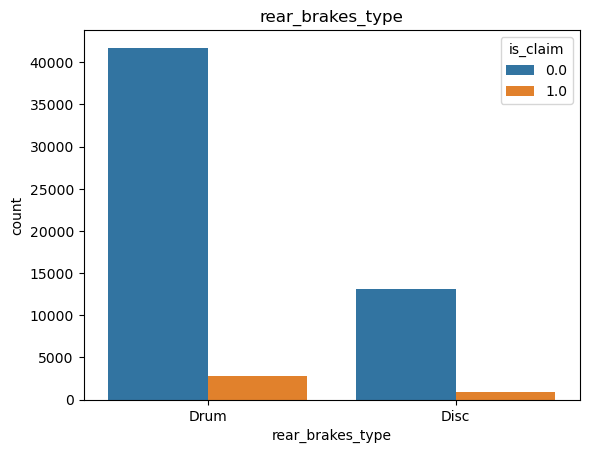

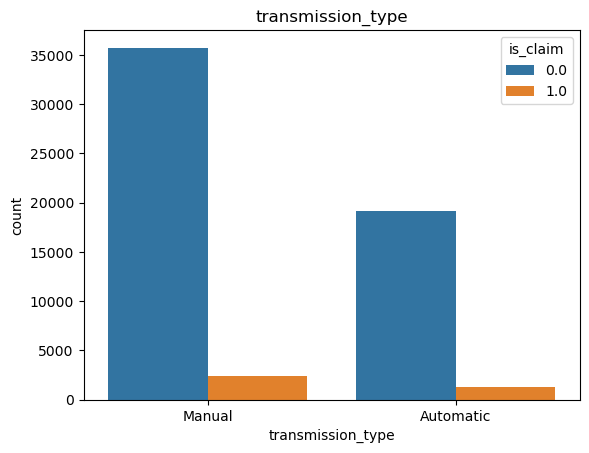

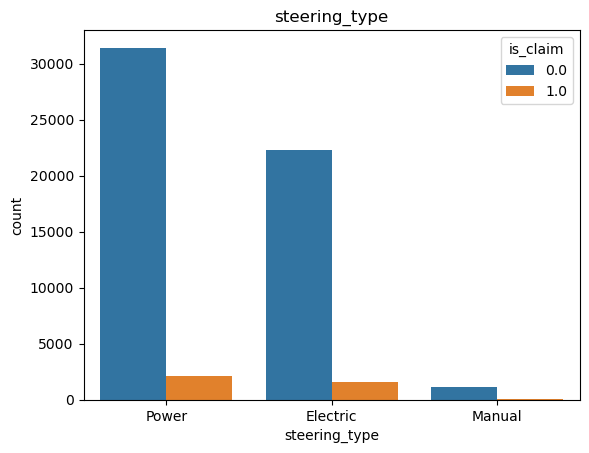

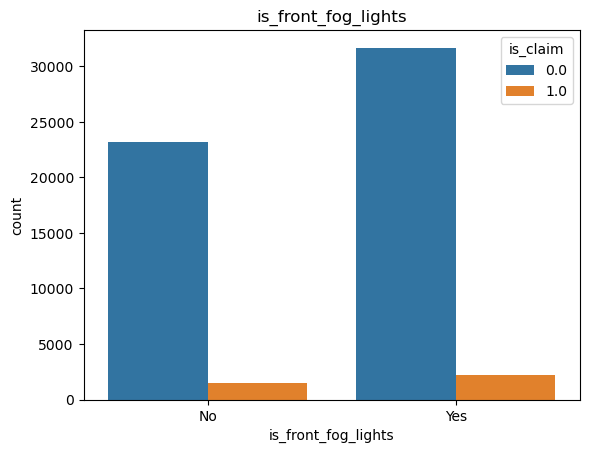

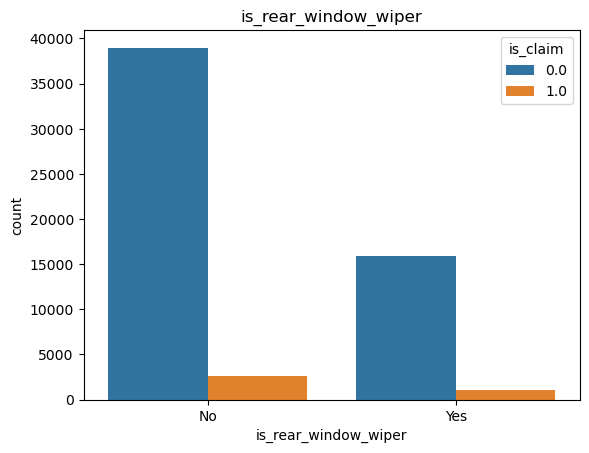

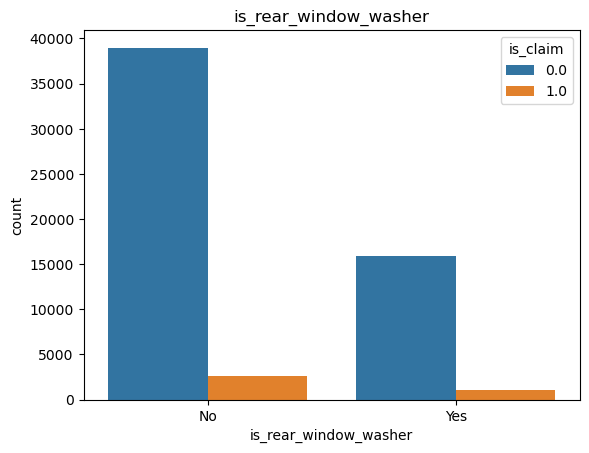

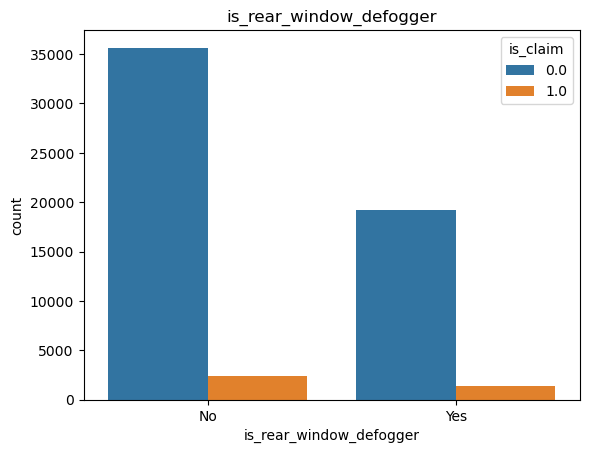

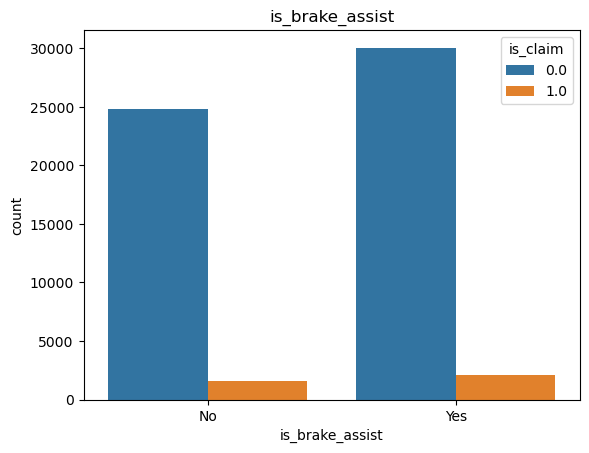

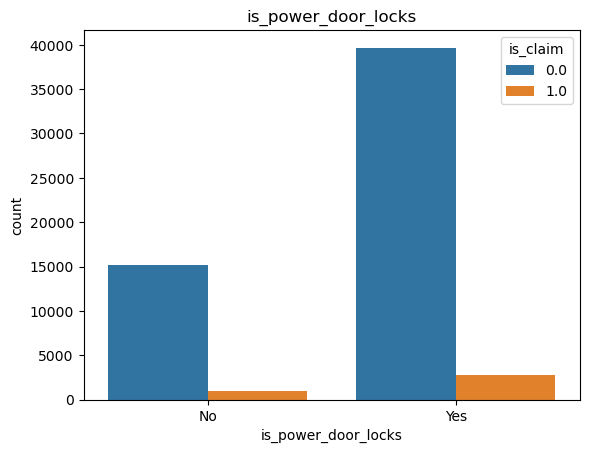

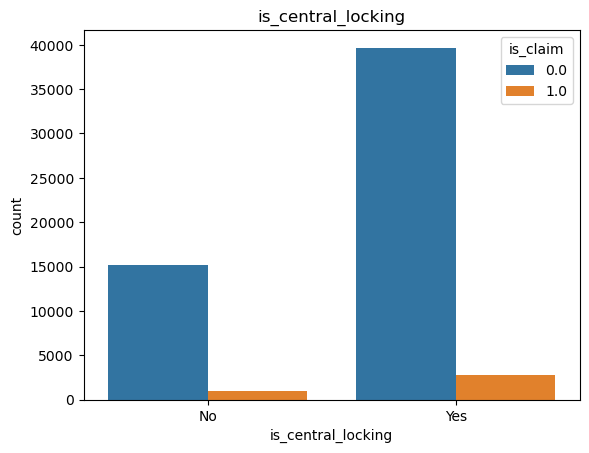

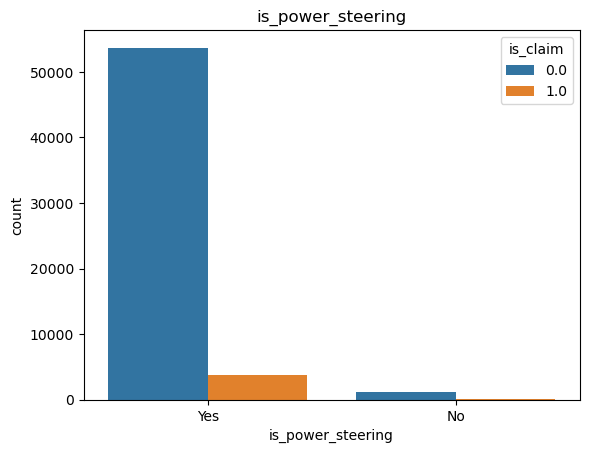

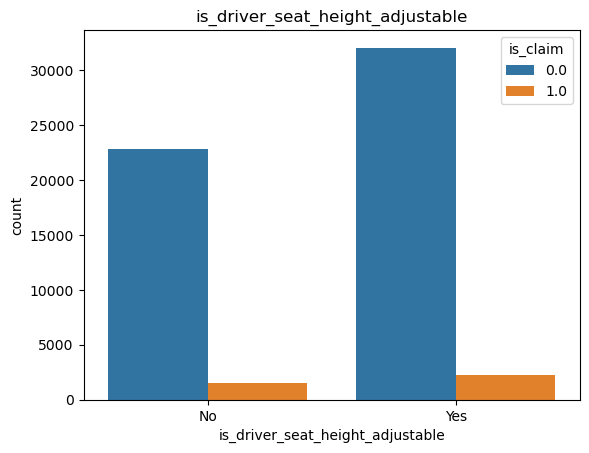

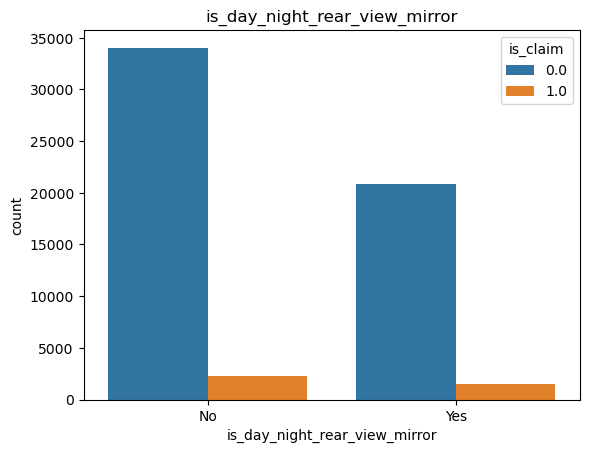

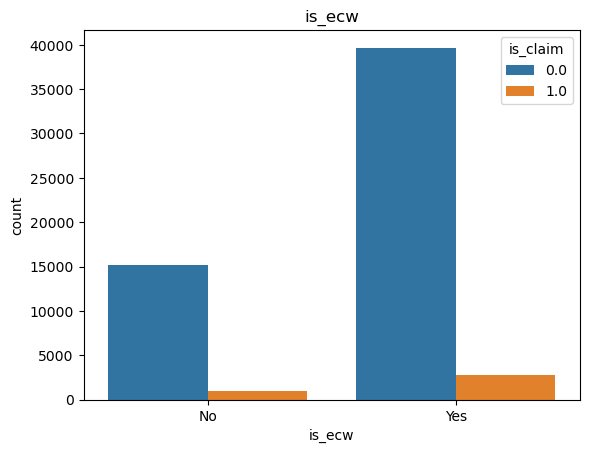

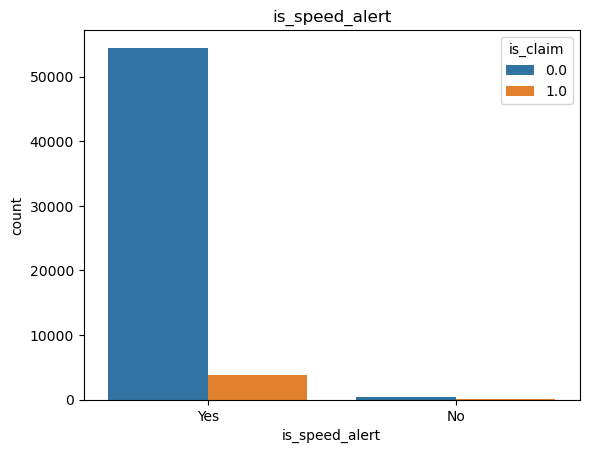

In [23]:
# Cat vas cat
for i in cat_cols[:-1]:
    sns.countplot(combined.loc[:,i],hue = combined.is_claim)
    plt.title(i)
    plt.show()

In [24]:
# C8 is the area cluster from where most of the claims emerge
# Kseries Dual Jet engine, No parking camera
# Model M^,B@ segemnet, Drum brakes are some of the components bringing claims to doors of insurance company

In [25]:
train.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

### Feature Engineering & statistical Analysis

In [26]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0


In [27]:
a = combined.select_dtypes(include='O').columns

In [30]:
l = []
for i in a:
    a = combined[i].value_counts()
    if (a.index[0]=='Yes') | (a.index[0]=='No'):
        print(a)
        l.append(i)
        print('--')
print(l)

No     66997
Yes    30658
Name: is_esc, dtype: int64
--
Yes    59044
No     38611
Name: is_adjustable_steering, dtype: int64
--
No     74272
Yes    23383
Name: is_tpms, dtype: int64
--
Yes    93632
No      4023
Name: is_parking_sensors, dtype: int64
--
No     59466
Yes    38189
Name: is_parking_camera, dtype: int64
--
Yes    56394
No     41261
Name: is_front_fog_lights, dtype: int64
--
No     69386
Yes    28269
Name: is_rear_window_wiper, dtype: int64
--
No     69386
Yes    28269
Name: is_rear_window_washer, dtype: int64
--
No     63489
Yes    34166
Name: is_rear_window_defogger, dtype: int64
--
Yes    53485
No     44170
Name: is_brake_assist, dtype: int64
--
Yes    70733
No     26922
Name: is_power_door_locks, dtype: int64
--
Yes    70733
No     26922
Name: is_central_locking, dtype: int64
--
Yes    95721
No      1934
Name: is_power_steering, dtype: int64
--
Yes    56993
No     40662
Name: is_driver_seat_height_adjustable, dtype: int64
--
No     60621
Yes    37034
Name: is_day_night_r

In [31]:
len(l)

17

In [32]:
# for col in combined.columns:
#     if col.startswith('is'):
#         combined[col].replace({'Yes':1,'No':0},inplace=True)

In [34]:
for i in l:
    combined[i].replace({'Yes':1,'No':0},inplace=True)

In [40]:
# Torque and bhp

combined[['bhp','rpm_torque']] = combined.max_power.str.split('@',expand=True)

In [43]:
combined.rename(columns={'rpm_torque':'rpm_power'},inplace=True) 

In [46]:
combined.head(1)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,bhp,rpm_power,Nm,rpm_torque
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36bhp,6000rpm,60Nm,3500rpm


In [42]:
combined.max_torque[0]

'60Nm@3500rpm'

In [45]:
combined[['Nm','rpm_torque']] = combined.max_torque.str.split('@',expand=True)

In [47]:
combined.head(1)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,bhp,rpm_power,Nm,rpm_torque
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36bhp,6000rpm,60Nm,3500rpm


In [48]:
# remove the bhp and rpm from the cols
combined['bhp'] = combined['bhp'].apply(lambda x: float(x[:-3]))
combined['rpm_power'] = combined['rpm_power'].apply(lambda x: float(x[:-3]))
combined['rpm_torque'] = combined['rpm_torque'].apply(lambda x: float(x[:-3]))
combined['Nm'] = combined['Nm'].apply(lambda x: float(x[:-2]))

In [49]:
combined.head(1)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,bhp,rpm_power,Nm,rpm_torque
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0


### multiple variable feature engineering

In [53]:
# weight per unit 
# age  =age of the car / age of the policy holder
# per unit power = rpm_power/bhp
# per unit torque = rpm_torque/Nm

for i in [combined]:
    i['weight_per_unit'] = i['gross_weight']/(i['height']*i['width']*i['length'])
    i['per_unit_power'] = i['rpm_power']/i['bhp']
    i['per_unit_torque'] = i['rpm_torque']/i['Nm']
    i['age'] = i['age_of_car']/i['age_of_policyholder']

In [55]:
combined.head(1)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,bhp,rpm_power,Nm,rpm_torque,weight_per_unit,per_unit_power,per_unit_torque,age
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.077612


## Statistical Analysis

In [56]:
# num cols and apply ttest

combined.select_dtypes(exclude='O').columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'is_claim', 'bhp', 'rpm_power', 'Nm',
       'rpm_torque', 'weight_per_unit', 'per_unit_power', 'per_unit_torque',
       'age'],
      dtype='object')

In [59]:
num = ['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density',
       'turning_radius', 'length', 'width', 'height', 'gross_weight','bhp', 'rpm_power', 'Nm',
       'rpm_torque', 'weight_per_unit', 'per_unit_power', 'per_unit_torque',
       'age']

In [60]:
len(num)

17

In [61]:
import scipy.stats as stats

In [68]:
signif_feats  =[]
for i in num:
    zero = combined.loc[combined.is_claim ==0,i]
    one = combined.loc[combined.is_claim  ==1,i]
    teststats, pvalue = stats.ttest_ind(zero,one)
    if pvalue<0.05:
        signif_feats.append(i)
print(signif_feats)

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'width', 'age']


In [66]:
# pip install category_encoders

In [69]:
# Categorical Target Encoding
import category_encoders as ce

In [71]:
combined.select_dtypes(include='O').head(1)

,policy_id,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,rear_brakes_type,transmission_type,steering_type,ncap_rating
0,ID00001,C1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,Drum,Manual,Power,0


In [70]:
combined.select_dtypes(include='O').columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'rear_brakes_type',
       'transmission_type', 'steering_type', 'ncap_rating'],
      dtype='object')

In [72]:
cat = ['area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'rear_brakes_type',
       'transmission_type', 'steering_type', 'ncap_rating']

In [73]:
# Split the data in Train and Test
newtrain = combined.loc[0:train.shape[0]-1,:]
newtest = combined.loc[train.shape[0]:,:]

newtrain.shape,newtest.shape,train.shape,test.shape

((58592, 52), (39063, 52), (58592, 44), (39063, 43))

In [75]:
# Dropping target from newtest
newtrain.drop(['policy_id','max_power','max_torque'],axis = 1,inplace=True)
newtest.drop(['policy_id','max_power','max_torque','is_claim'],axis = 1,inplace=True)

In [76]:
newtrain.shape,newtest.shape

((58592, 49), (39063, 48))

In [78]:
cat1 = ['area_cluster', 'segment', 'model', 'fuel_type','engine_type', 'rear_brakes_type',
       'transmission_type', 'steering_type', 'ncap_rating']

In [80]:
# target encoding
# import category_encoders as ce

tgt_encoder = ce.TargetEncoder(cols = cat1)

x = newtrain.drop('is_claim',axis =1)
y = newtrain['is_claim']

newx = tgt_encoder.fit_transform(x,y)
newtest =tgt_encoder.transform(newtest)

In [86]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

newx.select_dtypes(exclude='O').columns
cols = ['policy_tenure','population_density','displacement','turning_radius', 'length', 'width', 'height',
       'gross_weight','bhp', 'rpm_power', 'Nm',
       'rpm_torque', 'weight_per_unit', 'per_unit_power', 'per_unit_torque']

for i in cols:
    newx.loc[:,i] = ss.fit_transform(pd.DataFrame(newx.loc[:,i]))
    newtest.loc[:,i]  = ss.fit_transform(pd.DataFrame(newtest.loc[:,i]))

### Modeling

In [88]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# metrics 
from sklearn.metrics import cohen_kappa_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.feature_selection import RFE


In [94]:
def base_models():
    models = dict()
    models['lg'] = LogisticRegression()
    models['dt'] =DecisionTreeClassifier()
    models['rf'] = RandomForestClassifier()
    models['etree'] =ExtraTreesClassifier()
    models['ada']=AdaBoostClassifier()
    models['gbm'] = GradientBoostingClassifier()
    models['xgb'] = XGBClassifier()
    models['lgbm']= LGBMClassifier()
    return models

In [97]:
# Evaluate the model
from sklearn.model_selection import StratifiedKFold,cross_val_score

def eval_models(model):
    cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    scores = cross_val_score(estimator=model,X=newx,y=y,scoring='f1',cv=cv,error_score='raise',n_jobs=-1)
    return scores
    

In [103]:
# Build the Models...
models = base_models()

# List for the result and model names
result, names = list(),list()
for name, model in models.items():
    scores = eval_models(model)
    result.append(scores)   # this will save the f1 score
    names.append(name)    # this will save the name of the model..
    print(">%s %.3f (%.3f)"%(name,np.mean(scores),np.std(scores)))

>lg 0.000 (0.000)
>dt 0.087 (0.011)
>rf 0.018 (0.008)
>etree 0.031 (0.011)
>ada 0.000 (0.000)
>gbm 0.001 (0.002)
>xgb 0.001 (0.002)
>lgbm 0.000 (0.000)


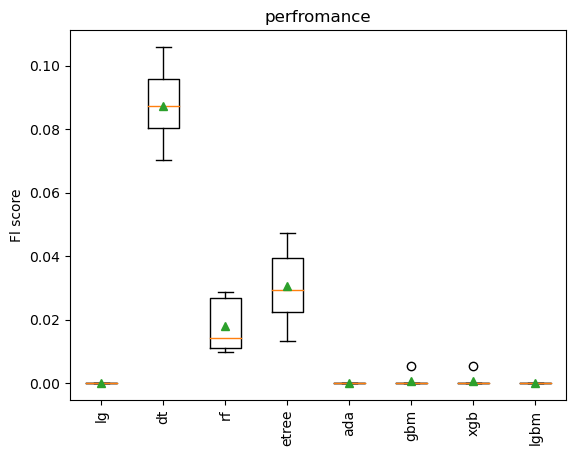

In [108]:
# Plotting the output
plt.boxplot(result, labels=names,showmeans = True)
plt.xticks(rotation=90)
plt.ylabel('Fl score')
plt.title('perfromance')
plt.show()

In [109]:
# Smote for handling the imbalance
from imblearn.over_sampling import SMOTE

smote =  SMOTE(sampling_strategy='minority')

smotex,smotey = smote.fit_resample(newx, y)


In [110]:
def base_models():
    models = dict()
    models['lg'] = LogisticRegression()
    models['dt'] =DecisionTreeClassifier()
    models['rf'] = RandomForestClassifier()
    models['etree'] =ExtraTreesClassifier()
    models['ada']=AdaBoostClassifier()
    models['gbm'] = GradientBoostingClassifier()
    models['xgb'] = XGBClassifier()
    models['lgbm']= LGBMClassifier()
    return models

In [111]:
# Evaluate the model
from sklearn.model_selection import StratifiedKFold,cross_val_score

def eval_models(model):
    cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    scores = cross_val_score(estimator=model,X=smotex,y=smotey,scoring='f1',cv=cv,error_score='raise',n_jobs=-1)
    return scores

In [112]:
# Build the Models...
models = base_models()

# List for the result and model names
result, names = list(),list()
for name, model in models.items():
    scores = eval_models(model)
    result.append(scores)   # this will save the f1 score
    names.append(name)    # this will save the name of the model..
    print(">%s %.3f (%.3f)"%(name,np.mean(scores),np.std(scores)))

>lg 0.588 (0.005)
>dt 0.918 (0.003)
>rf 0.935 (0.002)
>etree 0.934 (0.003)
>ada 0.720 (0.006)
>gbm 0.875 (0.006)
>xgb 0.960 (0.003)
>lgbm 0.952 (0.003)


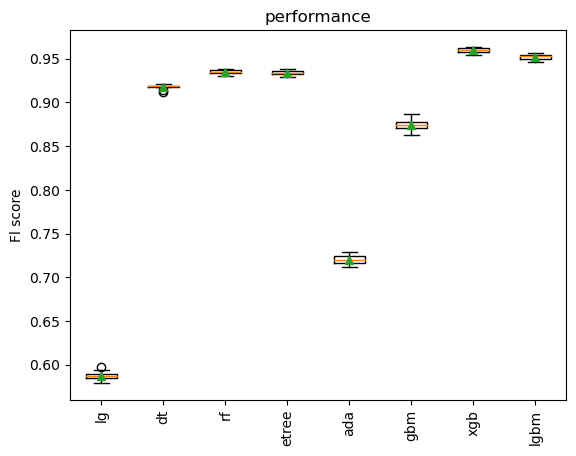

In [114]:
# Plotting the output
plt.boxplot(result, labels=names,showmeans = True)
plt.xticks(rotation=90)
plt.ylabel('Fl score')
plt.title('performance')
plt.show()

In [118]:
# rf,etree,gbm,xgb,lgbm

# Final Random forest Model

rf =RandomForestClassifier()
pred = []

kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

for train_index,test_index in kfold.split(smotex,smotey):
    xtrain = smotex.loc[train_index]
    ytrain = smotey.loc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(newtest))  

In [119]:
# Submission
finalpred = pd.DataFrame(pred).T.mode(axis=1)[0]
sub = pd.DataFrame({'policy_id':test.policy_id,'is_claim':finalpred})
sub.to_csv('RF_f1.csv',index=False)                                       # 0.111

In [120]:
xgb = XGBClassifier()
pred = []

for train_index,test_index in kfold.split(smotex,smotey):
    xtrain = smotex.loc[train_index]
    ytrain = smotey.loc[train_index]
    pred.append(xgb.fit(xtrain,ytrain).predict(newtest))              

In [121]:
# Submission
finalpred = pd.DataFrame(pred).T.mode(axis=1)[0]
sub = pd.DataFrame({'policy_id':test.policy_id,'is_claim':finalpred})
sub.to_csv('xgb.csv',index=False)                                           # 0.122

In [122]:
lgbm = LGBMClassifier()
pred = []

kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

for train_index,test_index in kfold.split(smotex,smotey):
    xtrain = smotex.loc[train_index]
    ytrain = smotey.loc[train_index]
    pred.append(lgbm.fit(xtrain,ytrain).predict(newtest)) 

In [123]:
# Submission
finalpred = pd.DataFrame(pred).T.mode(axis=1)[0]
sub = pd.DataFrame({'policy_id':test.policy_id,'is_claim':finalpred})
sub.to_csv('lgbm.csv',index=False)                                          # 0.07

In [124]:
lg = LogisticRegression()
pred = []

kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

for train_index,test_index in kfold.split(smotex,smotey):
    xtrain = smotex.loc[train_index]
    ytrain = smotey.loc[train_index]
    pred.append(lg.fit(xtrain,ytrain).predict(newtest)) 

In [126]:
# Submission
finalpred = pd.DataFrame(pred).T.mode(axis=1)[0]
sub = pd.DataFrame({'policy_id':test.policy_id,'is_claim':finalpred})
sub.to_csv('lg.csv',index=False)                                         # 0.151

### next steps
* Reduce the fold 5
* Try parameter tuning for XGboost and LGBM
* Take logistic regression as the best model and create as Stacking Classifier